# Regresión lógística binomial

## Carga de datos

In [1]:
import pandas as pd 
import numpy as np

Los datos que vamos a utilizar son de clientes que se dan de baja en una empresa de telecomunicaciones. Se busca predecir si un cliente se retira o se queda en la empresa de acuerdo a las siguientes caracteristicas: Servicios que puede contratar, informacion de contacto del cliente, informacion del contrato e informacion demografica.

In [2]:
df_data = pd.read_csv('./Telco-Customer-Churn.csv')

In [3]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Cambiar total_charges a numeric

In [7]:
# Si no toma los valores de TotalCharges automaticamente como numericos
# es porque presenta algun error. Para manejar los errores a la hora de convertirlos
# a numericos utilizamos el parametro 'coerce'
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce')

errors='coerce'

indica que si no se puede convertir un elemento de la columna TotalCharges a un número, se debe reemplazar con un valor especial NaN (Not a Number)

Esto se conoce como "coerción" porque se está forzando la conversión a un tipo de datos numérico, y si no es posible, se está forzando el uso de NaN en su lugar

## Manejo de datos nulos

In [9]:
df_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Debido a que todos los valores nulos se encuentran en TotalCharges, Pandas no lo reconocia de tipo numerico. Como son tan pocos los registros con valores faltantes, los eliminamos.

In [10]:
df_data.dropna(inplace=True)

In [11]:
df_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Eliminar id

Es una variable que no contribuye a el analisis de los datos por lo que la eliminamos

In [12]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df_data.drop('customerID',axis=1,inplace=True)

In [15]:
df_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Convertir a numérico variable objetivo

In [17]:
# Reemplazar Yes por 1 y No por 0
df_data['Churn'].replace(['Yes','No'], [1,0], inplace=True)

In [18]:
df_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [19]:
# creamos una copia de los datos ya tratados
df_data_processing = df_data.copy()

## Manejo de variables categóricas

In [20]:
# Convertimos variables categoricas en numericas con get_dummies
df_data_processing = pd.get_dummies(df_data_processing)
df_data_processing.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


**pd.get_dummies()** 
Es una función de la biblioteca pandas en Python que se utiliza para realizar una codificación one-hot de variables categóricas en un DataFrame. La codificación one-hot es un proceso que convierte variables categóricas en un conjunto de variables binarias (0 o 1) que representan la presencia o ausencia de una categoría en los datos originales. Este enfoque es comúnmente utilizado en el preprocesamiento de datos para que los algoritmos de aprendizaje automático puedan trabajar con variables categóricas.

**Descripción de cómo funciona pd.get_dummies()**

Entrada: La función toma como entrada un DataFrame de pandas que contiene una o más columnas con variables categóricas que deseas codificar.

Salida: pd.get_dummies() produce un nuevo DataFrame donde las columnas categóricas originales se han convertido en columnas binarias (0 o 1), una columna por categoría. Cada columna binaria representa una categoría específica y se llama "indicador" o "dummy variable". Cuando una fila tiene una categoría, su columna correspondiente tendrá un valor de 1; de lo contrario, será 0.

Por ejemplo, si tienes una columna llamada "Color" con valores categóricos como "Rojo", "Verde" y "Azul", pd.get_dummies() generará tres nuevas columnas llamadas "Color_Rojo", "Color_Verde" y "Color_Azul", y asignará 1 o 0 según el color presente en cada fila.

## Analisis de correlación

In [21]:
import matplotlib.pyplot as plt

Realizamos un analisis de correlacion en funcion de la variable objetivo debido a que hay muchas variables (46 variables) y un heatmap de las mismas sera dificil de leer

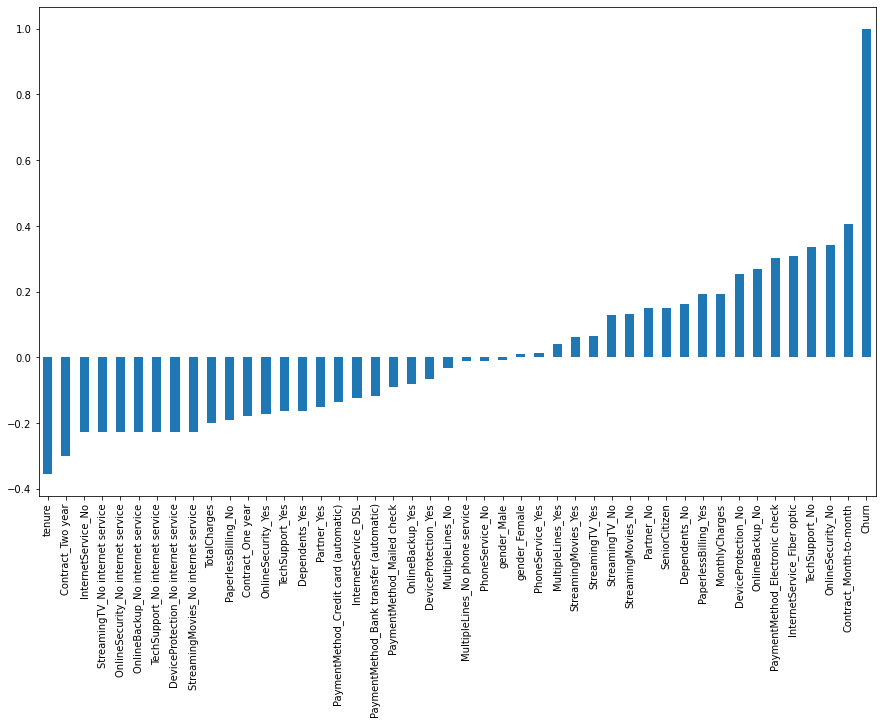

In [22]:
fig = plt.figure(figsize=(15,9))
df_data_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

La grafica de correlacion nos muestra que el Contrato_mes_a_mes tiene una mayor correlacion con la variable objetivo (Churn). este resultado se interpreta de la siguiente manera: Si el cliente tiene un contrato mes a mes es mas probable que deja la empresa.

Ademas, hay otras variables que se correlacionan con churn:

- No cuenta con seguridad online (OnlineSecurity_No)
- No cuenta con soporte tecnico (TechSupport_No)
- Contrato de fibra optica (IntermetService_Fiber optic)
- Contrato indefinido (ternure) Correlacion negativa
- Contrato a dos años  (Contract_two_year) Correlacion negativa

Tambien vemos que todas las variables presentan diferentes niveles de correlacion con Churn lo que indica una falta de multicolinealidad. Esto sugiere que no debemos eliminar variables ya que al parecer son independientes entre si.

## Escalabilidad de los datos

In [23]:
# libreria para escalar datos
from sklearn.preprocessing import MinMaxScaler

In [24]:
# creamos el objeto escalador
scaler = MinMaxScaler()

# pasamos al escalador los datos ajustados
df_data_processing_scaled =  scaler.fit_transform(df_data_processing)

In [25]:
df_data_processing_scaled

array([[0.        , 0.        , 0.11542289, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.46478873, 0.38507463, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.01408451, 0.35422886, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.14084507, 0.11293532, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.04225352, 0.55870647, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.91549296, 0.86965174, ..., 0.        , 0.        ,
        0.        ]])

Vemos que los datos han sido convertidos a numeros de 0 a 1. Los datos se muestran en un array o tensor; para mostrarlos en un dataframe procedemos como sigue:

In [26]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [27]:
df_data_processing_scaled

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.323944,0.662189,0.227521,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,0.0,1.000000,0.845274,0.847461,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,0.0,0.140845,0.112935,0.037809,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,1.0,0.042254,0.558706,0.033210,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Al escalar los datos, hemos perdido los nombres de las variables. Para recuperarlos, procedemos como sigue:

In [28]:
df_data_processing_scaled.columns = df_data_processing.columns

In [29]:
df_data_processing_scaled.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Análisis exploratorio de datos

In [30]:
import seaborn as sns

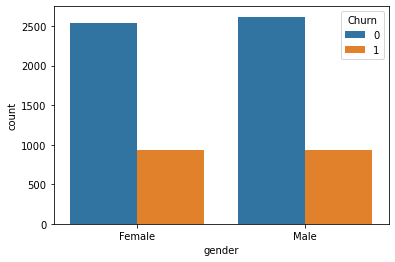

In [31]:
# utilizamos los datos de origen, no los procesados
sns.countplot(data=df_data, x='gender',hue='Churn')
plt.show()

La grafica nos indica que hay casi la misma cantidad de hombres y mujeres que dejan la empresa. Es decir, el genero no es relevante sobre Churn.

Debemos hacer la misma grafica para cada variable categorica. Para agilizar el proceso creamos una funcion que nos ayude con la tarea.

In [39]:
# Funcion para graficar variables categoricas en funcion de la variable objetivo
def plot_categoricals2(columns, df, ncols = 2):
    # numero de graficas a realizar
    nplot = len(columns)
    nrows = (nplot // ncols) + 1

    # creacion de la malla
    fig, axes = plt.subplots(nrows, ncols, figsize=(15,30), constrained_layout=True)

    # recorriendo malla y creando graficos
    for row in range(nrows):
        for col in range(ncols):
            title = columns[row+col]
            sns.countplot(data=df, x=title, hue='Churn', ax=axes[row,col])
            axes[row,col].set_title(title.upper())
            axes[row,col].set_xlabel(title)
            axes[row,col].set_ylabel('Count')
            axes[row,col].legend()
    fig.tight_layout()
    plt.show()

In [33]:
# Seleccionamos las variables categoricas del df original
column_cat = df_data.select_dtypes(include='object').columns

/tmp/ipykernel_3517/289120406.py:19: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


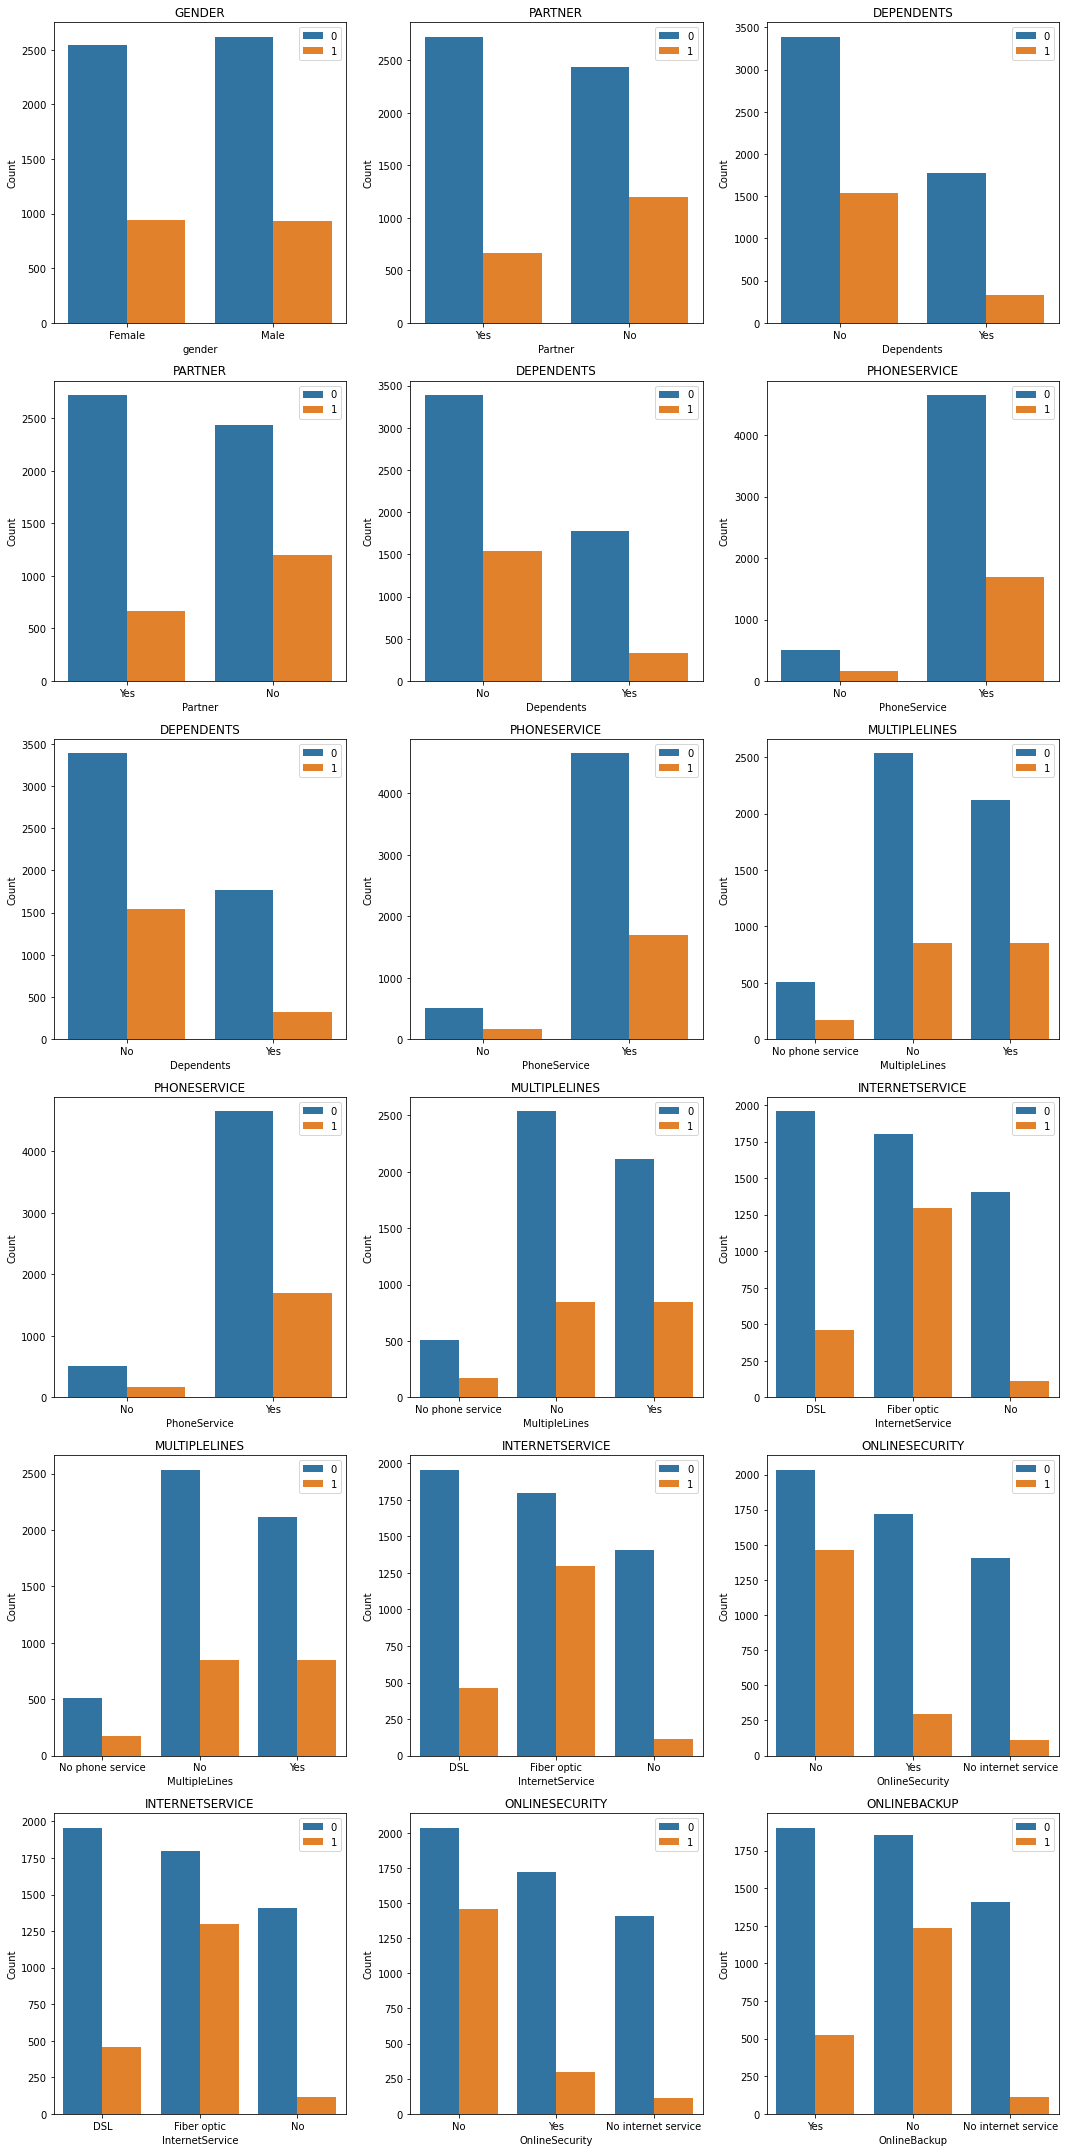

In [40]:
# Llamamos la funcion y le pasamos las variables categoricas, el dataframe y la cantidad de
# columnas de la malla
plot_categoricals2(column_cat, df_data, 3)

Ahora realizamos un EDA sobre las variables numericas

<Figure size 720x720 with 0 Axes>

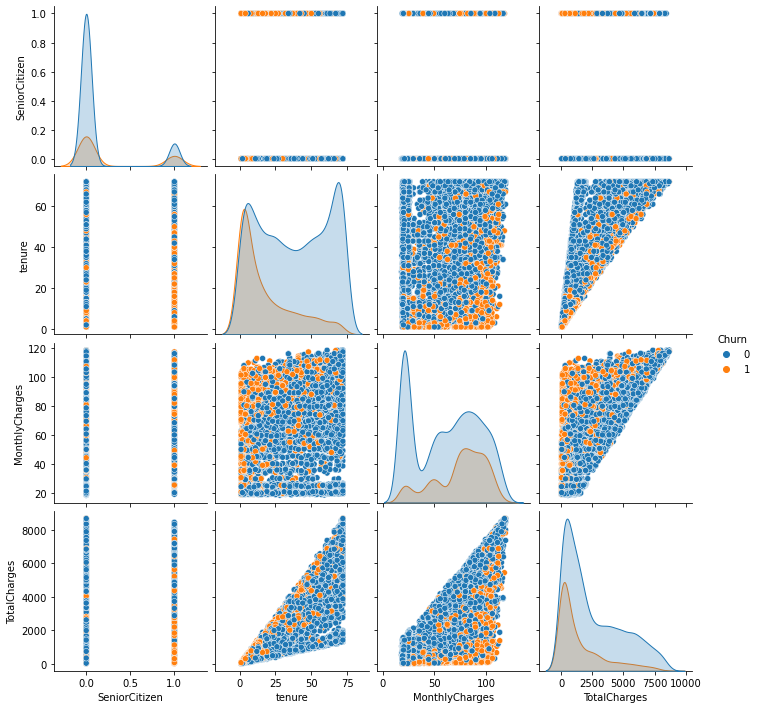

In [41]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data= df_data, hue='Churn')
plt.show()

Los graficos muestran:

- Cuando los cargos mensuales son altos y el cliente no lleva mucho tiempo con la empresa tiende a ser mucho mas Churn

- Cuando el cargo total aumenta mes a mes los clientes tienden a hacer mas Churn.

## Entrenamiento del modelo de regresión logística binomial

In [29]:
X = df_data_processing_scaled.drop('Churn',axis=1)
y = df_data_processing_scaled['Churn'].values

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [33]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))

0.795734597156398


## Evaluación del modelo

In [34]:
model.predict_proba(X_test)

array([[0.99021177, 0.00978823],
       [0.86177511, 0.13822489],
       [0.30193033, 0.69806967],
       ...,
       [0.9902827 , 0.0097173 ],
       [0.70132399, 0.29867601],
       [0.82865287, 0.17134713]])

In [35]:
model.coef_

array([[ 2.16456990e-01, -3.10072660e+00, -1.62292340e-01,
         1.19636831e+00,  9.43016868e-04, -2.24737354e-02,
        -7.14909690e-02,  4.99602504e-02,  1.16812883e-01,
        -1.38343602e-01,  8.51173107e-02, -1.06648029e-01,
        -1.58852500e-01,  8.51173107e-02,  5.22044710e-02,
        -4.17808188e-01,  5.11413449e-01, -1.15135980e-01,
         2.40094138e-01, -1.15135980e-01, -1.46488877e-01,
         8.40801258e-02, -1.15135980e-01,  9.52513520e-03,
         5.65235946e-02, -1.15135980e-01,  3.70816665e-02,
         2.20220334e-01, -1.15135980e-01, -1.26615073e-01,
        -8.59172265e-02, -1.15135980e-01,  1.79522487e-01,
        -8.76596177e-02, -1.15135980e-01,  1.81264879e-01,
         7.42707461e-01, -9.75358724e-02, -6.66702307e-01,
        -1.13985776e-01,  9.24550579e-02, -2.72279162e-03,
        -1.58695884e-01,  2.16926872e-01, -7.70389150e-02]])

In [36]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

AxesSubplot(0.125,0.125;0.775x0.755)


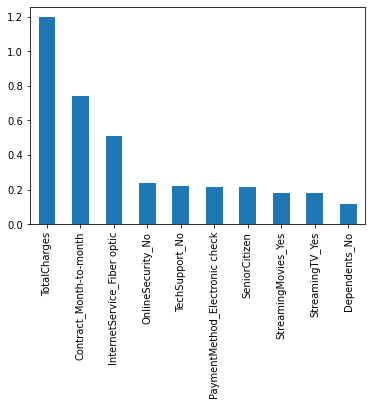

In [37]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values) 
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


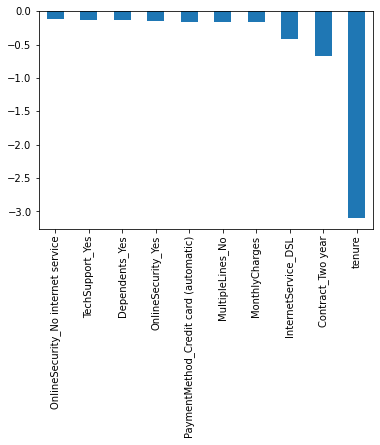

In [38]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 792x792 with 0 Axes>

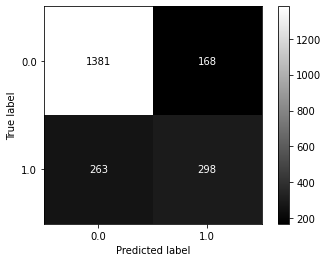

In [42]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()